# Titanic dataset Part 1 : Exploratory Analysis

In [296]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

# Reading the data
data_raw = pd.read_csv('train.csv')
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [297]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [299]:
# There are number of NaN values in the 'Cabin' and 'Age' columns. Numerical attributes can be interpolated (if it makes sense)
# but categorical values cannot be filled up. Since removing all rows with a NaN in the 'Cabin' column reduces the data set size
# drastically, we will create a modified training set, namely one with the 'Cabin' column removed alltogether and 
# also with the rows = NaN in the 'Age' column removed
titanic_df = data_raw.copy()
data_ml = titanic_df.drop('Cabin', axis =1).dropna(subset = ['Age'])
data_ml.info()
# Looks like the 'Embarked' column has NaN values
# Another way of identifying columns with NaNs
# data_raw1.isnull().any()
data_ml.dropna(subset = ['Embarked']).info()
# We will use this dataset for all machine learning algorithms to be applied later in part 2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float6

In [300]:
# However, we will use the original dataset for some simple exploratory analysis. 
data_exp = data_raw.copy()
data_exp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [301]:
# Some columns seem interesting : Age, Sex, Cabin, Sib, Pclass. Using these columns we cna get soime insights as to how much 
# factors like age, sex, class of ticket influenced a passenger's fate
# Some questions we will try to answer are:

# 1. What is the relation between the passenger class and the cabin deck (lower deck passengers had lower chances of survival)?
# 2. What is the relation between passenger class and gender?
# 3. How is passenger class related to age and sex?
# 4. What is the survival statistics based on passenger class and deck?
# 5. Was there any gender based allocation of cabins in different decks?
# 6. How did presence of sibling or spouse affect a passenger's fate?
# 7. Is there any correlation between passenger class, sex and port of origin?
# 8. What factors helped a passenger survive?

In [302]:
# 1. What is the relation between passenger class and cabin deck
# The first letter of the codes in the 'Cabin' column provides the deck

# creating a dataframe with the deck values
temp_df = data_exp['Cabin'].dropna()
temp_df.head()
decks = []
index = []
for ind, val in zip(temp_df.index.values, temp_df): #recording the index labels, this will be useful for dataframe concatenation
    decks.append(val[0])
    index.append(ind)

deck_df = pd.DataFrame(decks, index = index) 
deck_df.columns = ['Decks'] #giving a name to the column
deck_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 889
Data columns (total 1 columns):
Decks    204 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


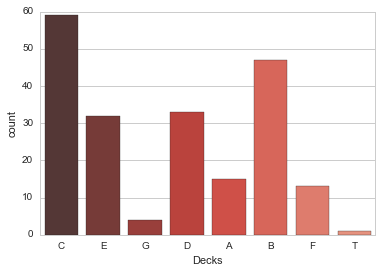

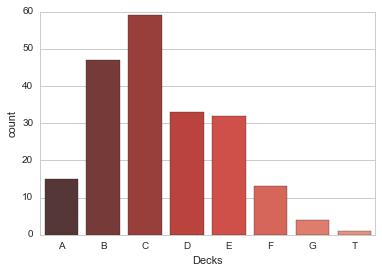

In [303]:
# for plotting lets sort the values of the list so that the x label index in our plot appears in aplhabetic order
decks_sorted = sorted(decks) # not in place sorting
# decks.sort() # sorting in place
# with unsorted column values
plt.figure()
sns.countplot('Decks', data = deck_df, palette = 'Reds_d')

# with sorted column values
deck_df_sorted = pd.DataFrame(decks_sorted)
deck_df_sorted.columns = ['Decks']
plt.figure()
sns.countplot('Decks', data = deck_df_sorted, palette = 'Reds_d')
# Seems B and C are the most populous decks

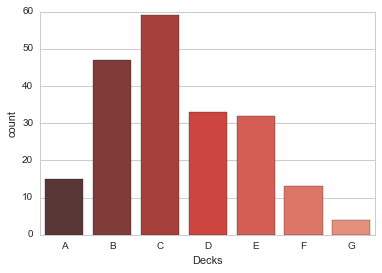

In [304]:
# We will remove the deck category 'T'(seems out of place)
# with sorted column values
deck_df = deck_df[deck_df['Decks'] !='T']
deck_df_sorted = deck_df_sorted[deck_df_sorted['Decks'] !='T']
sns.countplot('Decks', data = deck_df_sorted, palette = 'Reds_d')

In [305]:
# lets dive deep and see if we can get an idea of the number of people in each class on each deck. Note that we can use only
# those rows where the deck varibale is not NaN.
data_temp1 = data_exp.dropna(subset = ['Cabin'])
data_temp1.info() # The Pclass and Cabin columns have same number of non-null rows, and therefore can be compared
# Lets add the deck column we created to this dataframe
data_temp2 = pd.concat([data_temp1,deck_df], axis = 1) # concat funstion automatically aligns rows with same indices. 
data_temp2.head()

# Note in all analysis where the 'Cabin' data  or the 'Decks' column is required, we will use the data_temp2 dataframe, whereas 
# for other analysis, we shall use the bigger set named data_exp

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    204 non-null int64
Survived       204 non-null int64
Pclass         204 non-null int64
Name           204 non-null object
Sex            204 non-null object
Age            185 non-null float64
SibSp          204 non-null int64
Parch          204 non-null int64
Ticket         204 non-null object
Fare           204 non-null float64
Cabin          204 non-null object
Embarked       202 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 20.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Decks
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,C


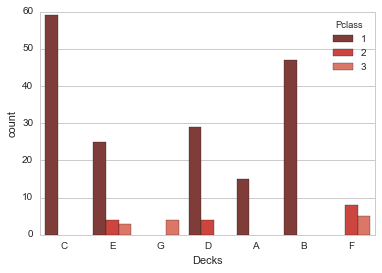

In [306]:
sns.countplot(x = 'Decks', data = data_temp2, hue = 'Pclass', palette = 'Reds_d') # note that the x labels are not sorted.  
# This can be an issue with the new pd.Categorical type in seaborn (See:
# https://stackoverflow.com/questions/27306373/how-to-stop-seaborn-visualisation-sorting-the-values-on-the-x-axis-of-a-bar-char)
# Matplotlib can be used to plot such categorial plots but involves more work 

# It seems based on the available information, passengers in class 1 were concentrated on decks A,B,C,D, and E. Passengers with 
# lower class tickets were confined to decks F and G

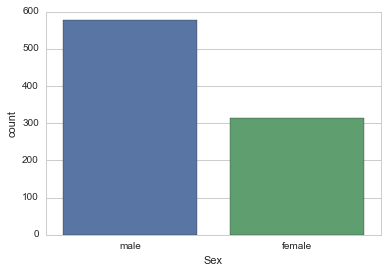

In [307]:
# 2. What is the relation between passenger class and gender?
sns.countplot('Sex', data = data_exp)

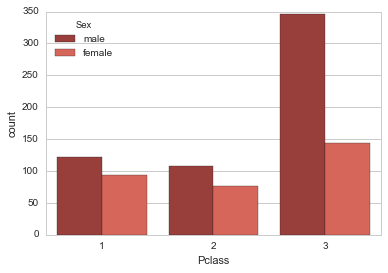

In [308]:
# 3. How is passenger class related to age and sex?
sns.countplot('Pclass', hue = 'Sex', data = data_exp, palette = 'Reds_d')
# A lot more male passengers in class 3

In [309]:
# Finding the relation between passenger class and age
# Lets consider any passenger under 15 to be a child

def pass_category(pass_det):
    age, sex = pass_det
    if age < 18:
        return 'child'
    else:
        return sex
    
data_exp['Person Category'] = data_exp[['Age', 'Sex']].apply(pass_category, axis = 1)

#Lets update the other datafrmae data_temp2 so that the new colummn is included
data_temp1 = data_exp.dropna(subset = ['Cabin'])
data_temp2 = pd.concat([data_temp1,deck_df], axis = 1) # concat funstion automatically aligns rows with same indices. 
data_temp2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person Category,Decks
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,female,C


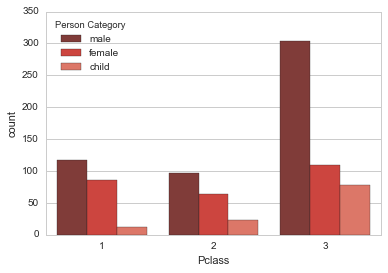

In [310]:
# Now lets see how the passengers were distributed according to class
sns.countplot('Pclass', hue = 'Person Category', data = data_exp, palette = 'Reds_d')
# seems most of the children under 15 years of age were in class 3. Not many children in the first class.

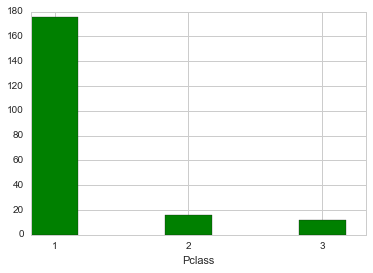

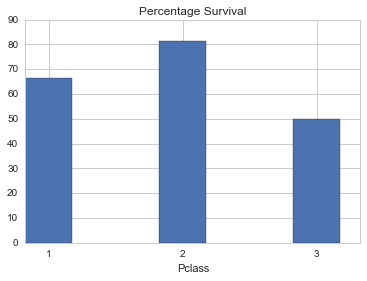

In [311]:
# 4. What is the survival statistics based on passenger class and deck?
# The analysis for question 1 brings us right into question 2.  

# Distribution of passengers under each class
var1 = list(data_temp2['PassengerId'].groupby(data_temp2['Pclass']).count())
plt.figure()
width = 0.35
plt.bar(np.arange(len(df)),df, width = width, color = 'green')
plt.xticks(np.arange(len(df))+width/2, [1,2,3])
plt.xlabel('Pclass')
# Dataset seems skewed with most records belonging to first class passengers

# Let's see how the passenger class relates to survival. We will pot percentage of passengers from each class that survived
var2 = list(data_temp2['PassengerId'][data_temp2['Survived']==1].groupby(data_temp2['Pclass']).count())
surv_perc_pclass = [(val2/val1)*100 for val1, val2 in zip(var1,var2)]
plt.figure()
plt.bar(np.arange(len(surv_perc_pclass)),surv_perc_pclass, width = width)
plt.xticks(np.arange(len(surv_perc_pclass))+width/2, [1,2,3])
plt.xlabel('Pclass')
plt.title('Percentage Survival')
# Majority of class 2 passengers survived. Class 3 faired poorly and fate was almost based on a coin toss. 

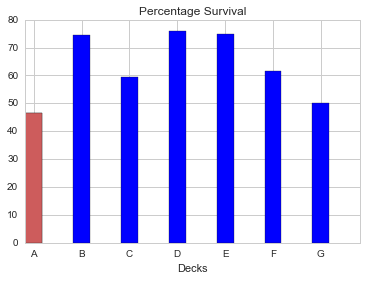

In [312]:
# Based on the analysis for question 1, it seems most of the surviving passengers were from decks A, B, C, D, and E 
# (as these decks had most of class 1 and 2 passengers). Lets verify this.

var1 = data_temp2['PassengerId'].groupby(data_temp2['Decks']).count()
var2 = data_temp2['PassengerId'][data_temp2['Survived']==1].groupby(data_temp2['Decks']).count()

surv_perc_decks = [(val2/val1)*100 for val1, val2 in zip(var1,var2)]
min_surv_perc = np.argmin(surv_perc_decks) 
xind = ['A','B','C','D','E','F','G']
plt.figure()
plt.bar(np.arange(len(surv_perc_decks)),surv_perc_decks, width = width, color = 'blue')
plt.bar(min_surv_perc, surv_perc_decks[min_surv_perc], width = width, color = 'indianred')
plt.xticks(np.arange(len(surv_perc_decks))+width/2, xind)
plt.xlabel('Decks')
plt.title('Percentage Survival')

# Surprisingly the highest fatality rate was among passengers on deck A followed closely by those on deck G (all passengers 
# in deck G were from class 3).

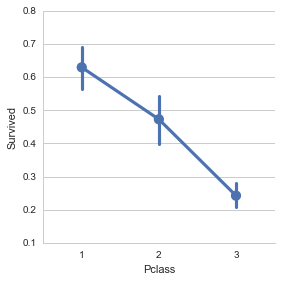

In [313]:
sns.factorplot('Pclass', 'Survived', data = data_exp)
# This shows the rate of survival for the passengers from class 3 are substantially lower compared to those from the other two
# classes

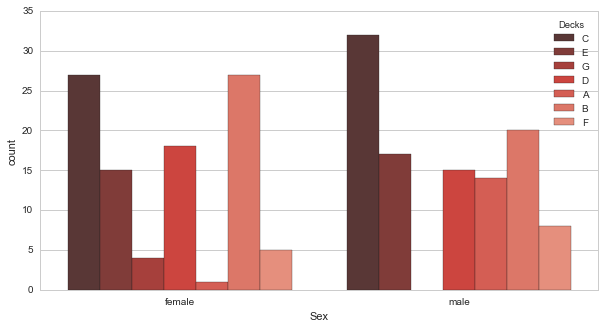

In [314]:
# 5. Was there any gender based allocation of cabins on different decks?
plt.figure(figsize= (10,5))
sns.countplot(x = 'Sex', data = data_temp2, hue = 'Decks', palette = 'Reds_d')
# Seems most female passengers were on the three decks B,C,D whereas decks A,D,F had almost uniformly distributed male 
# passengers. Most passengers on deck A were male passengers. This inutitively makes sense as we found out the highest fatality
# rate was among passengers from Deck A. Surprisingly, deck G had no male passengers.

,Parch,Person Category
10,1,child
205,1,child
251,1,female
394,2,female


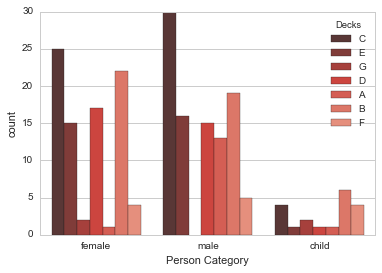

In [339]:
# Absence of male passengers on deck G is surprising. Lets try to find the possible reason
# Lets check the distribution of passengers on each deck based on age.
sns.countplot('Person Category', hue = 'Decks', data = data_temp2, palette = 'Reds_d')

# Lets see the group of people on deck G belonged to
var1 = data_temp2[['Parch', 'Person Category']][data_temp2['Decks']=='G']
var1
# Based on the smaller dataset, the occupants of deck G were children with single parent onboard the ship. Based on the age of 
# child, it may be guessed that the accompanying parent was the mother. Hence the absence of male passengers.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person Category,Decks
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,child,G
205,206,0,3,"Strom, Miss. Telma Matilda",female,2,0,1,347054,10.4625,G6,S,child,G
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29,1,1,347054,10.4625,G6,S,female,G
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24,0,2,PP 9549,16.7000,G6,S,female,G


In [349]:
# 6. How did presence of sibling or spouse affect a passenger's fate?
# Lets create a column specifying whether a passenger was alone or with family (in a group)

data_exp['Group Size'] = data_exp['Parch'] + data_exp['SibSp']
def alone(passenger):
    grp_size = passenger
    if grp_size>0:
        return 'In group'
    else:
        return 'Alone'
    
data_exp['Group Size'] = data_exp['Group Size'].apply(alone)
data_exp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person Category,Group Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,In group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,In group
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,In group
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


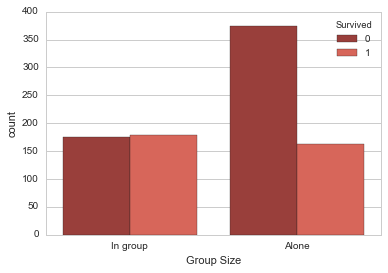

In [350]:
sns.countplot('Group Size', hue = 'Survived', data = data_exp, palette = 'Reds_d')
# Majority of passengers who were not accompanied by family members did not survive. For passengers with family, the outcome 
# was more or less balanced.

In [362]:
# 7. Is there any correlation between passenger class, sex and port of origin?
data_exp.isnull().any()

PassengerId        False
Survived           False
Pclass             False
Name               False
Sex                False
Age                 True
SibSp              False
Parch              False
Ticket             False
Fare               False
Cabin               True
Embarked            True
Person Category    False
Group Size         False
dtype: bool

In [365]:
data_exp.info()
data_exp.dropna(subset = ['Embarked']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                714 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           889 non-null object
Person Category    891 non-null object
Group Size         891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 104.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
PassengerId        889 non-null int64
Survived           889 non-null int64
Pclass             889 non-null int64
Name               889 non-null object
Sex                889 non-nul

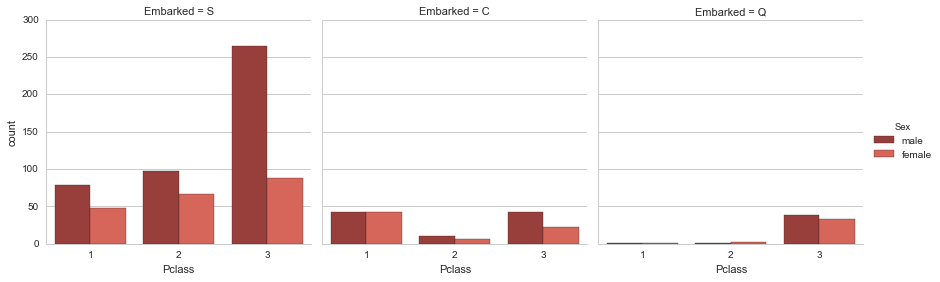

In [370]:
sns.factorplot(x = 'Pclass', hue = 'Sex', col = 'Embarked', data = data_exp, palette = 'Reds_d', kind = 'count')
# Majority of passengers in class 3 were from Southampton. Queenstown had almost negligible passengers for class 1 and 2

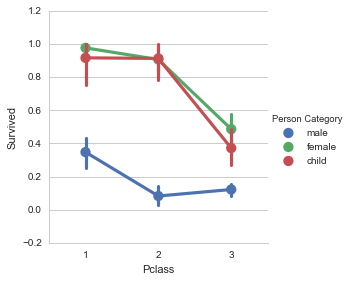

In [372]:
# 8. What factors helped a passenger survive?
sns.factorplot( 'Pclass', 'Survived', hue = 'Person Category', data = data_exp)
# The ratio of male passenger from class 3 that survived is really low. This can be considered as a factor that influenced the
# fate of the passenger.
# Also the answer of question 6 showed that passengers who were alone had low rate of survivability.

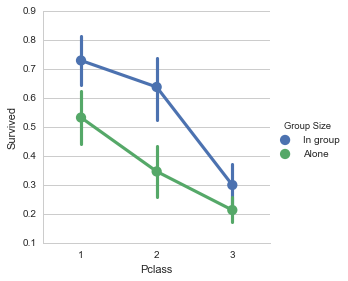

In [374]:
sns.factorplot( 'Pclass', 'Survived', hue = 'Group Size', data = data_exp)
# This plot shows that being alone and in class 3 had the lowest survival rate.

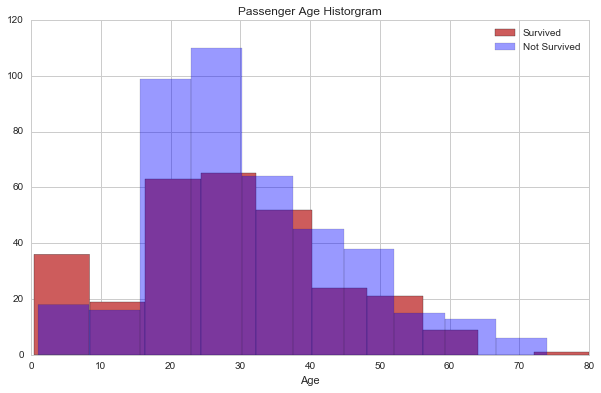

In [396]:
x1 = list(data_exp['Age'][data_exp['Survived']==1].dropna())
x0 = list(data_exp['Age'][data_exp['Survived']==0].dropna())
width = 0.35
fig, ax =  plt.subplots(figsize=(10,6))
p1 = ax.hist(x1, bins = 10, color = 'indianred', alpha = 1, label = 'Survived')
p0 = ax.hist(x0, bins = 10, color = 'blue', alpha = 0.4, label = 'Not Survived')
plt.legend(loc = 'best')
plt.title('Passenger Age Historgram')
plt.xlabel('Age')
# Passengers between ages of 18 to 32 were most likely to survive.

In [397]:
data_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                714 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           889 non-null object
Person Category    891 non-null object
Group Size         891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 104.4+ KB
